In [1]:
<h3><center> АНАЛИЗ И МОДЕЛИРОВАНИЕ НЕЙРОСЕТЕВОГО ЭКВАЛАЙЗЕРА ДЛЯ СТАЦИОНАРНОГО КАНАЛА С МЕЖСИМВОЛНОЙ ИНТЕРФЕРЕНЦЕЙ </center></h3>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from random import randint
from numpy import tanh

<h3><center> Моделирование канала с интерференцией </center></h3>

In [2]:
class QAM:  
    def __init__(self, channel, modulation_type='QAM4', n=30000, SNR=25):
        if modulation_type == 'QAM4':
            m, modulate = 4, self.QAM4()
        elif modulation_type == 'QAM16':
            m, modulate = 16, self.QAM16()
        elif modulation_type == 'QAM64':
            m, modulate = 64, self.QAM64()
        elif modulation_type == 'QAM256':
            m, modulate = 256, self.QAM256()
        
        bin_symbols = self.gen_data(m, n)
        
        self.symbols = np.array([modulate(bin_symbol) for bin_symbol in bin_symbols]).T
        isi_output = self.isi_channel(self.symbols, channel)
        isi_output = np.vstack([np.real(isi_output), np.imag(isi_output)])
        self.signal = self.add_Gaussian_noise(isi_output, SNR)
        
    
    def QAM4(self):
        return lambda b: np.complex((1 - 2 *  b[0]), (1 - 2 *  b[1])) / np.sqrt(2)
    
    def QAM16(self):
        return lambda b: np.complex((1 - 2 * b[0]) * (2 - (1 - 2 * b[2])), \
                                    (1 - 2 * b[1]) * (2 - (1 - 2 * b[3]))) / np.sqrt(10)
    
    def QAM64(self):
        return lambda b: np.complex((1 - 2 * b[0]) * (4 - (1 - 2 * b[2]) * (2 - (1 - 2 * b[4]))),
                                    (1 - 2 * b[1]) * (4 - (1 - 2 * b[3]) * (2 - (1 - 2 * b[5])))) / np.sqrt(42)
    
    def QAM256(self):
        b = lambda b: np.complex((1 - 2 * b[0]) * (8 - (1 - 2 * b[2]) * \
                                 (4 - (1 - 2 * b[4]) * (2 - (1 - 2 * b[6])))), \
                                 
                                 (1 - 2 * b[1]) * (8 - (1 - 2 * b[3]) * \
                                 (4 - (1 - 2 * b[5]) * (2 - (1 - 2 * b[7]))))) \
                                / np.sqrt(170)
        return b 
    
    def add_Gaussian_noise(self, symbols, SNR):
        noise_std = np.sqrt(.5 * np.power(10, - SNR / 10))
        noise = np.random.normal(0, noise_std, size=symbols.shape)
        return symbols + noise
        
    def isi_channel(self, x, channel):
        return np.convolve(x, channel)
    
    def gen_data(self, m, n):
        width = np.log2(m).astype(np.int)
        int_data = np.random.randint(0, m, size=(n, ))
        return list(map(lambda x: list(map(int, np.binary_repr(x, width))), int_data))
    
        
    def get_signal(self):
        symbols = np.vstack([np.real(self.symbols), np.imag(self.symbols)])
        return symbols, self.signal
        

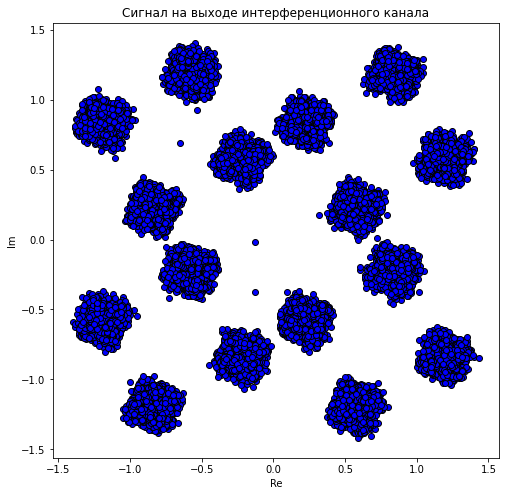

In [3]:
channel = [1, 0.5 * np.exp(1j * np.pi / 6), 0.1 * np.exp(-1j * np.pi / 8)]
modulation_type = 'QAM4'
obj = QAM(channel, modulation_type) 
y_array, X_array = obj.get_signal()
plt.figure(figsize=(8, 8))
plt.title(modulation_type)
plt.scatter(X_array[0, :], X_array[1, :], c='b', edgecolor='k')
plt.title('Сигнал на выходе интерференционного канала')
plt.xlabel('Re')
plt.ylabel('Im')
plt.show()

<h3><center> Структурная схема LSTM ячейки для векторно-матричных операций </center></h3>

![Структурная схема LSTM (только прямой проход)](LSTM_FIGURES.png)

<h3><center> Структурная схема эксперимента </center></h3>

![Структурная схема модели](Structure_of_model.png)

<h3><center>Размерности и уравнения прямого прохода </center></h3>

d - Размерность входа

h - Размерность линейного слоя

$W_{xf},W_{xi},W_{xc},W_{xo}\in R^{d\times h}$

$W_{hf},W_{hi},W_{hc},W_{ho}\in R^{h\times h}$

$b_{f},b_{i},b_{c},b_{o}\in R^{2\times h}$

$X_{t}\in R^{2\times d}$

$F_{t},I_{t},\widetilde{C_{t}},O_{t},C_{t},H_{t}\in R^{2\times h}$

$W_{hy}\in R^{h\times1}$

$f=tanh$

$g=tanh$

• $F_{t}=\sigma_{f}\left(X_{t}W_{xf}+H_{t-1}W_{hf}+b_{f}\right)\in R^{2\times h}=R^{2\times d}\times R^{d\times h}+R^{2\times h}\times R^{h\times h}+R^{2\times h}$

• $I_{t}=\sigma_{i}\left(X_{t}W_{xi}+H_{t-1}W_{hi}+b_{i}\right)\in R^{2\times h}=R^{2\times d}\times R^{d\times h}+R^{2\times h}\times R^{h\times h}+R^{2\times h}$

• $\widetilde{C_{t}}=f\left(X_{t}W_{xc}+H_{t-1}W_{hc}+b_{c}\right)\in R^{2\times h}=R^{2\times d}\times R^{d\times h}+R^{2\times h}\times R^{h\times h}+R^{2\times h}$

• $O_{t}=\sigma_{o}\left(X_{t}W_{xo}+H_{t-1}W_{ho}+b_{f}\right)\in R^{2\times h}=R^{2\times d}\times R^{d\times h}+R^{2\times h}\times R^{h\times h}+R^{2\times h}$

• $C_{t}=C_{t-1}\odot F_{t}+I_{t}\odot\widetilde{C_{t}}\in R^{1\times h}=R^{2\times h}\odot R^{2\times h}+R^{2\times h}\odot R^{2\times h}$

• $K_{t}=g\left(C_{t}\right)\in R^{2\times h}$

• $H_{t}=K_{t}\odot O_{t}\in R^{2\times h}=R^{2\times h}\odot R^{2\times h}$

• $y_{t}=H_{t}W_{hy}\in R^{2\times1}=R^{2\times h}\times R^{h\times1}$

• $L=\frac{1}{2}\left(d-y_{t}\right)^{2}\in R^{2\times1}• L=\frac{1}{2}\left(d-y_{t}\right)^{2}\in R^{2\times1}$


<h3><center>Априори рассчитанные градиенты для физического моделирования</center></h3>


• $\nabla L=X_{t}^{T}\left(\sigma'_{f}\left(X_{t}W_{xf}+H_{t-1}W_{hf}+b_{f}\right)\odot\left(C_{t-1}\odot\left(g'\left(C_{t}\right)\odot\left(O_{t}\odot\left(y_{t}-d\right)W_{hy}^{T}\right)\right)\right)\right)$ для $\boldsymbol{W}_{\boldsymbol{xf}}$

• $\nabla L=X_{t}^{T}\left(\sigma'_{i}\left(X_{t}W_{xi}+H_{t-1}W_{hi}+b_{i}\right)\odot\left(\widetilde{C_{t}}\odot\left(g'\left(C_{t}\right)\odot\left(O_{t}\odot\left(\left(y_{t}-d\right)W_{hy}^{T}\right)\right)\right)\right)\right) $ для $\boldsymbol{W}_{\boldsymbol{xi}}$

• $\nabla L=X_{t}^{T}\left(f'\left(X_{t}W_{xc}+H_{t-1}W_{hc}+b_{c}\right)\odot\left(I_{t}\odot\left(g'\left(C_{t}\right)\odot\left(O_{t}\odot\left(\left(y_{t}-d\right)W_{hy}^{T}\right)\right)\right)\right)\right)$ для $\boldsymbol{W}_{\boldsymbol{xc}}$

• $\nabla L=X_{t}^{T}\left(\sigma'_{o}\left(X_{t}W_{xo}+H_{t-1}W_{ho}+b_{f}\right)\odot\left(K_{t}\odot\left(\left(y_{t}-d\right)W_{hy}^{T}\right)\right)\right)$ для $\boldsymbol{W}_{\boldsymbol{xo}}$

• $\nabla L=H_{t}^{T}\left(y_{t}-d\right)$ для $\boldsymbol{W}_{\boldsymbol{hy}}$

• $\nabla L=H_{t-1}^{T}\left(\sigma'_{f}\left(X_{t}W_{xf}+H_{t-1}W_{hf}+b_{f}\right)\odot\left(C_{t-1}\odot\left(g'\left(C_{t}\right)\odot\left(O_{t}\odot\left(\left(y_{t}-d\right)W_{hy}^{T}\right)\right)\right)\right)\right)$ для $\boldsymbol{W}_{\boldsymbol{hf}}$

• $\nabla L=H_{t-1}^{T}\left(\sigma'_{i}\left(X_{t}W_{xi}+H_{t-1}W_{hi}+b_{i}\right)\odot\left(\widetilde{C_{t}}\odot\left(g'\left(C_{t}\right)\odot\left(O_{t}\odot\left(\left(y_{t}-d\right)W_{hy}^{T}\right)\right)\right)\right)\right) $ для $\boldsymbol{W}_{\boldsymbol{hi}}$

• $\nabla L=H_{t-1}^{T}\left(f'\left(X_{t}W_{xc}+H_{t-1}W_{hc}+b_{c}\right)\odot\left(I_{t}\odot\left(g'\left(C_{t}\right)\odot\left(O_{t}\odot\left(\left(y_{t}-d\right)W_{hy}^{T}\right)\right)\right)\right)\right)$ для $\boldsymbol{W}_{\boldsymbol{hc}}$

• $\nabla L=H_{t-1}^{T}\left(\sigma'_{o}\left(X_{t}W_{xo}+H_{t-1}W_{ho}+b_{f}\right)\odot\left(K_{t}\odot\nabla\left(\left(y_{t}-d\right)W_{hy}^{T}\right)\right)\right)$ для $\boldsymbol{W}_{\boldsymbol{ho}}$

• $\nabla L=\sigma'_{f}\left(X_{t}W_{xf}+H_{t-1}W_{hf}+b_{f}\right)\odot\left(C_{t-1}\odot\left(g'\left(C_{t}\right)\odot\left(O_{t}\odot\left(\left(y_{t}-d\right)W_{hy}^{T}\right)\right)\right)\right)$ для $\boldsymbol{b_{f}}$

• $\nabla L=\sigma'_{i}\left(X_{t}W_{xi}+H_{t-1}W_{hi}+b_{i}\right)\odot\left(\widetilde{C_{t}}\odot\left(g'\left(C_{t}\right)\odot\left(O_{t}\odot\left(\left(y_{t}-d\right)W_{hy}^{T}\right)\right)\right)\right)$ для $\boldsymbol{b_{i}}$

• $\nabla L=f'\left(X_{t}W_{xc}+H_{t-1}W_{hc}+b_{c}\right)\odot\left(I_{t}\odot\left(g'\left(C_{t}\right)\odot\left(O_{t}\odot\left(\left(y_{t}-d\right)W_{hy}^{T}\right)\right)\right)\right)$ для $\boldsymbol{b_{c}}$

• $\nabla L=\sigma'_{o}\left(X_{t}W_{xo}+H_{t-1}W_{ho}+b_{f}\right)\odot\left(K_{t}\odot\left(\left(y_{t}-d\right)W_{hy}^{T}\right)\right) $ для $\boldsymbol{b_{o}}$


In [4]:
class LSTMEqualizer:
    def __init__(self, params, mu, beta):
        self.params = params
        self.mu = mu
        self.beta = beta
        self.v_new = {}
        self.v_old = {}
        for weight_name in self.params.keys():
            if weight_name == "C(t)":
                break
            self.v_new[weight_name] = np.zeros(self.params[weight_name].shape)
        
        
    def forward(self, x):
        params = self.params       
        params['C(t-1)'] = params['C(t)']
        params['H(t-1)'] = params['H(t)']
        params['F(t)'] = self.sigmoid(x @ params['W_xf'] + params['H(t-1)'] @ params['W_hf'] + params['b_f'])
        params['I(t)'] = self.sigmoid(x @ params['W_xi'] + params['H(t-1)'] @ params['W_hi'] + params['b_i'])
        params['C_wave(t)'] = tanh(x @ params['W_xc'] + params['H(t-1)'] @ params['W_hc'] + params['b_c'])
        params['O(t)'] = self.sigmoid(x @ params['W_xo'] + params['H(t-1)'] @ params['W_ho'] + params['b_o'])
        params['C(t)'] = params['C(t-1)'] * params['F(t)'] + params['I(t)'] * params['C_wave(t)']
        params['H(t)'] = tanh(params['C(t)']) * params['O(t)']
        y_pred = params['H(t)'] @ params['W_hy']   
        self.params = params
        return y_pred
    
    def backward(self, x, y_pred, y):
        params = self.params
        temp = self.dtanh(params['C(t)']) * (params['O(t)'] * ((y_pred - y) @ params['W_hy'].T))
            
        dsigmoid_f = self.dsigmoid(x @ params['W_xf'] + params['H(t-1)'] @ params['W_hf'] + params['b_f'])
        dsigmoid_i = self.dsigmoid(x @ params['W_xi'] + params['H(t-1)'] @ params['W_hi'] + params['b_i'])
        dtanh = self.dtanh(x @ params['W_xc'] + params['H(t-1)'] @ params['W_hc'] + params['b_c'])
        dsigmoid_o = self.dsigmoid(x @ params['W_xo'] + params['H(t-1)'] @ params['W_ho'] + params['b_o'])
        
        dW_xf = x.T @ (dsigmoid_f * (params['C(t-1)'] * temp))
        dW_xi = x.T @ (dsigmoid_i * (params['C_wave(t)'] * temp))
        dW_xc = x.T @ (dtanh * (params['I(t)'] * temp))    
        dW_xo = x.T @ (dsigmoid_o * (tanh(params['C(t)']) * ((y_pred - y) * params['W_hy'].T))) 
       
        dW_hf = params['H(t-1)'].T @ (dsigmoid_f * (params['C(t-1)'] * temp))
        dW_hi = params['H(t-1)'].T @ (dsigmoid_i * (params['C_wave(t)'] * temp))
        dW_hc = params['H(t-1)'].T @ (dtanh * (params['I(t)'] * temp))
        dW_ho = params['H(t-1)'].T @ (dsigmoid_o * tanh(params['C(t)']) * ((y_pred - y) @ params['W_hy'].T))
        
        db_f = dsigmoid_f * (params['C(t-1)'] * temp)
        db_i = dsigmoid_i * (params['C_wave(t)'] * temp)
        db_c = dtanh * (params['I(t)'] * temp)
        db_o = dsigmoid_o * (tanh(params['C(t)']) * ((y_pred - y) @ params['W_hy'].T))
        
        dW_hy = params['H(t)'].T @ (y_pred - y)
        self.gradients = dict(W_xf = dW_xf, W_xi = dW_xi, W_xc = dW_xc, W_xo = dW_xo,
                              W_hf = dW_hf, W_hi = dW_hi, W_hc = dW_hc, W_ho = dW_ho, W_hy = dW_hy, 
                              b_f = db_f, b_i = db_i, b_c = db_c, b_o = db_o)
        
    def step(self):
        for weight_name in self.gradients.keys():
            self.v_old[weight_name] = self.v_new[weight_name]
            self.v_new[weight_name] = self.beta * self.v_old[weight_name] - mu * self.gradients[weight_name]
            self.params[weight_name] += self.v_new[weight_name]
        
    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))        
        
    def dsigmoid(self, x):
        return self.sigmoid(x) * (1 - self.sigmoid(x))
    
    def dtanh(self, x):
        return np.ones(x.shape) - np.square(tanh(x))
        
h, d = 10, 30
params = {'W_xf': np.random.normal(0, 1e-4, size=((d, h))),
          'W_xi': np.random.normal(0, 1e-4, size=((d, h))),
          'W_xc': np.random.normal(0, 1e-4, size=((d, h))),
          'W_xo': np.random.normal(0, 1e-4, size=((d, h))),
          'W_hf': np.random.normal(0, 1e-4, size=((h, h))),
          'W_hi': np.random.normal(0, 1e-4, size=((h, h))),
          'W_hc': np.random.normal(0, 1e-4, size=((h, h))),
          'W_ho': np.random.normal(0, 1e-4, size=((h, h))),
          'W_hy': np.random.normal(0, 1e-4, size=((h, 1))),
          'b_f': np.random.normal(0, 1e-4, size=((2, h))),
          'b_i': np.random.normal(0, 1e-4, size=((2, h))),
          'b_c': np.random.normal(0, 1e-4, size=((2, h))),
          'b_o': np.random.normal(0, 1e-4, size=((2, h))),
          
          'C(t)': np.random.normal(0, 1e-4, size=((2, h))),
          'H(t)': np.random.normal(0, 1e-4, size=((2, h))),
          'C(t-1)': np.random.normal(0, 1e-4, size=((2, h))),      
          'H(t-1)': np.random.normal(0, 1e-4, size=((2, h))),
          'C_wave(t)': np.random.normal(0, 1e-4, size=((2, h)))}


mu, beta = 5 * 1e-5, 0.999      
LSTM = LSTMEqualizer(params, mu, beta)

<h3><center>Обучение</center></h3>

In [5]:
# Валидация запрещена
loss = []
epochs = y_array.shape[1] - d
print(epochs)
for i in range(epochs):
    X, y = X_array[:, i : d + i], y_array[:, i : i + 1]
    y_pred = LSTM.forward(X)
    loss.append(np.square(y_pred - y))
    LSTM.backward(X, y_pred, y)
    LSTM.step()
loss = np.array(loss)
loss = loss[:, 0] + 1j * loss[:, 1]
print(f'Энергия последних 100 отсчетов сигнала ошибки: \
        {np.var([np.real(loss[-100:-1, :]), np.imag(loss[-100:-1, :])])}')


29970
Энергия последних 100 отсчетов сигнала ошибки:         2.8130808783153205e-07


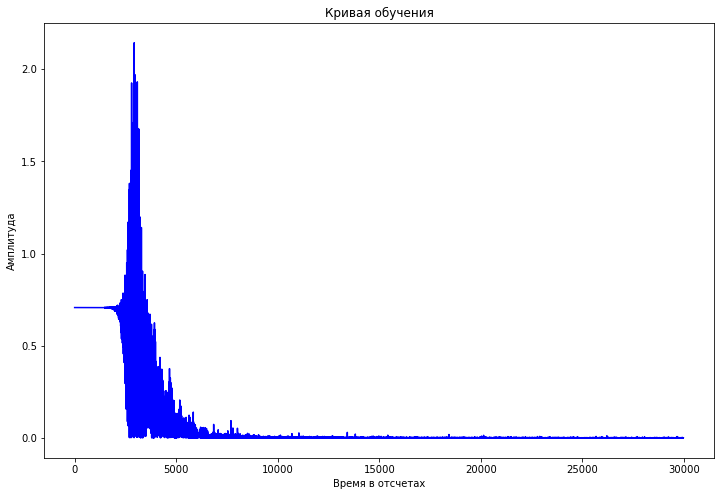

In [6]:
plt.figure(figsize=(12, 8))
plt.plot(np.abs(loss), c='b')
plt.title('Кривая обучения')
plt.xlabel('Время в отсчетах')
plt.ylabel('Амплитуда')
plt.show()

<h3><center>Тестирование</center></h3>

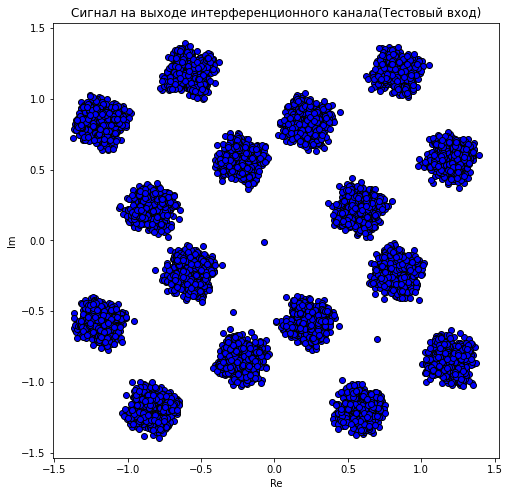

In [7]:
modulation_type = 'QAM4'
obj = QAM(channel, modulation_type, 10000) 
y_array, X_array = obj.get_signal()
plt.figure(figsize=(8, 8))
plt.title(modulation_type)
plt.scatter(X_array[0, :], X_array[1, :], c='b', edgecolor='k')
plt.title('Сигнал на выходе интерференционного канала(Тестовый вход)')
plt.xlabel('Re')
plt.ylabel('Im')
plt.show()

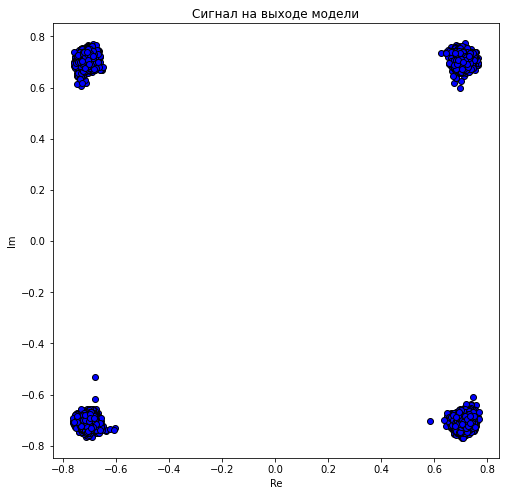

In [8]:
output = []
epochs = y_array.shape[1] - d
for i in range(epochs):
    X, y = X_array[:, i : d + i], y_array[:, i : i + 1]
    y_pred = LSTM.forward(X)
    output.append(y_pred)

output = np.array(output)
plt.figure(figsize=(8, 8))
plt.title(modulation_type)
plt.scatter(output[:, 0], output[:, 1], c='b', edgecolor='k')
plt.title('Сигнал на выходе модели')
plt.xlabel('Re')
plt.ylabel('Im')
plt.show()